In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data acquisition 

In [43]:
cust=pd.read_csv('Customer Churn.csv')
cust.describe()

,age,balance,day,duration,campaign,ndays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 2. EDA - Exploratory Data Analysis

In [44]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age                   11162 non-null int64
job                   11162 non-null object
marital               11162 non-null object
education             11162 non-null object
default               11162 non-null object
balance               11162 non-null int64
housing               11162 non-null object
loan                  11162 non-null object
communication type    11162 non-null object
day                   11162 non-null int64
month                 11162 non-null object
duration              11162 non-null int64
campaign              11162 non-null int64
ndays                 11162 non-null int64
previous              11162 non-null int64
poutcome              11162 non-null object
deposit               11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [45]:
cust['housing_num']=cust['housing'].apply(lambda x: 1 if(x=='yes') else 0)
cust.head(5)

,age,job,marital,education,default,balance,housing,loan,communication type,day,month,duration,campaign,ndays,previous,poutcome,deposit,housing_num
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0


In [46]:
cust.replace('unknown',np.nan,inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
age                   11162 non-null int64
job                   11092 non-null object
marital               11162 non-null object
education             10665 non-null object
default               11162 non-null object
balance               11162 non-null int64
housing               11162 non-null object
loan                  11162 non-null object
communication type    8816 non-null object
day                   11162 non-null int64
month                 11162 non-null object
duration              11162 non-null int64
campaign              11162 non-null int64
ndays                 11162 non-null int64
previous              11162 non-null int64
poutcome              2836 non-null object
deposit               11162 non-null object
housing_num           11162 non-null int64
dtypes: int64(8), object(10)
memory usage: 1.5+ MB


In [47]:
cust.apply(lambda x: sum(x.isnull()),axis = 0) # checking missing values in each column of train dataset

age                      0
job                     70
marital                  0
education              497
default                  0
balance                  0
housing                  0
loan                     0
communication type    2346
day                      0
month                    0
duration                 0
campaign                 0
ndays                    0
previous                 0
poutcome              8326
deposit                  0
housing_num              0
dtype: int64

In [48]:
cust_deposit_yes=cust[cust['housing']=='yes']
cust_deposit_yes.describe()

,age,balance,day,duration,campaign,ndays,previous,housing_num
count,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.0
mean,39.111153,1266.151108,15.526794,384.832986,2.527552,58.732437,0.830525,1.0
std,9.203011,2539.064030,8.028058,369.804577,2.946629,121.793473,2.504894,0.0
min,20.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,1.0
25%,32.000000,88.000000,8.000000,129.000000,1.000000,-1.000000,0.000000,1.0
50%,37.000000,465.000000,15.000000,250.000000,2.000000,-1.000000,0.000000,1.0
75%,45.000000,1386.000000,21.000000,543.000000,3.000000,-1.000000,0.000000,1.0
max,78.000000,45248.000000,31.000000,3253.000000,63.000000,854.000000,58.000000,1.0


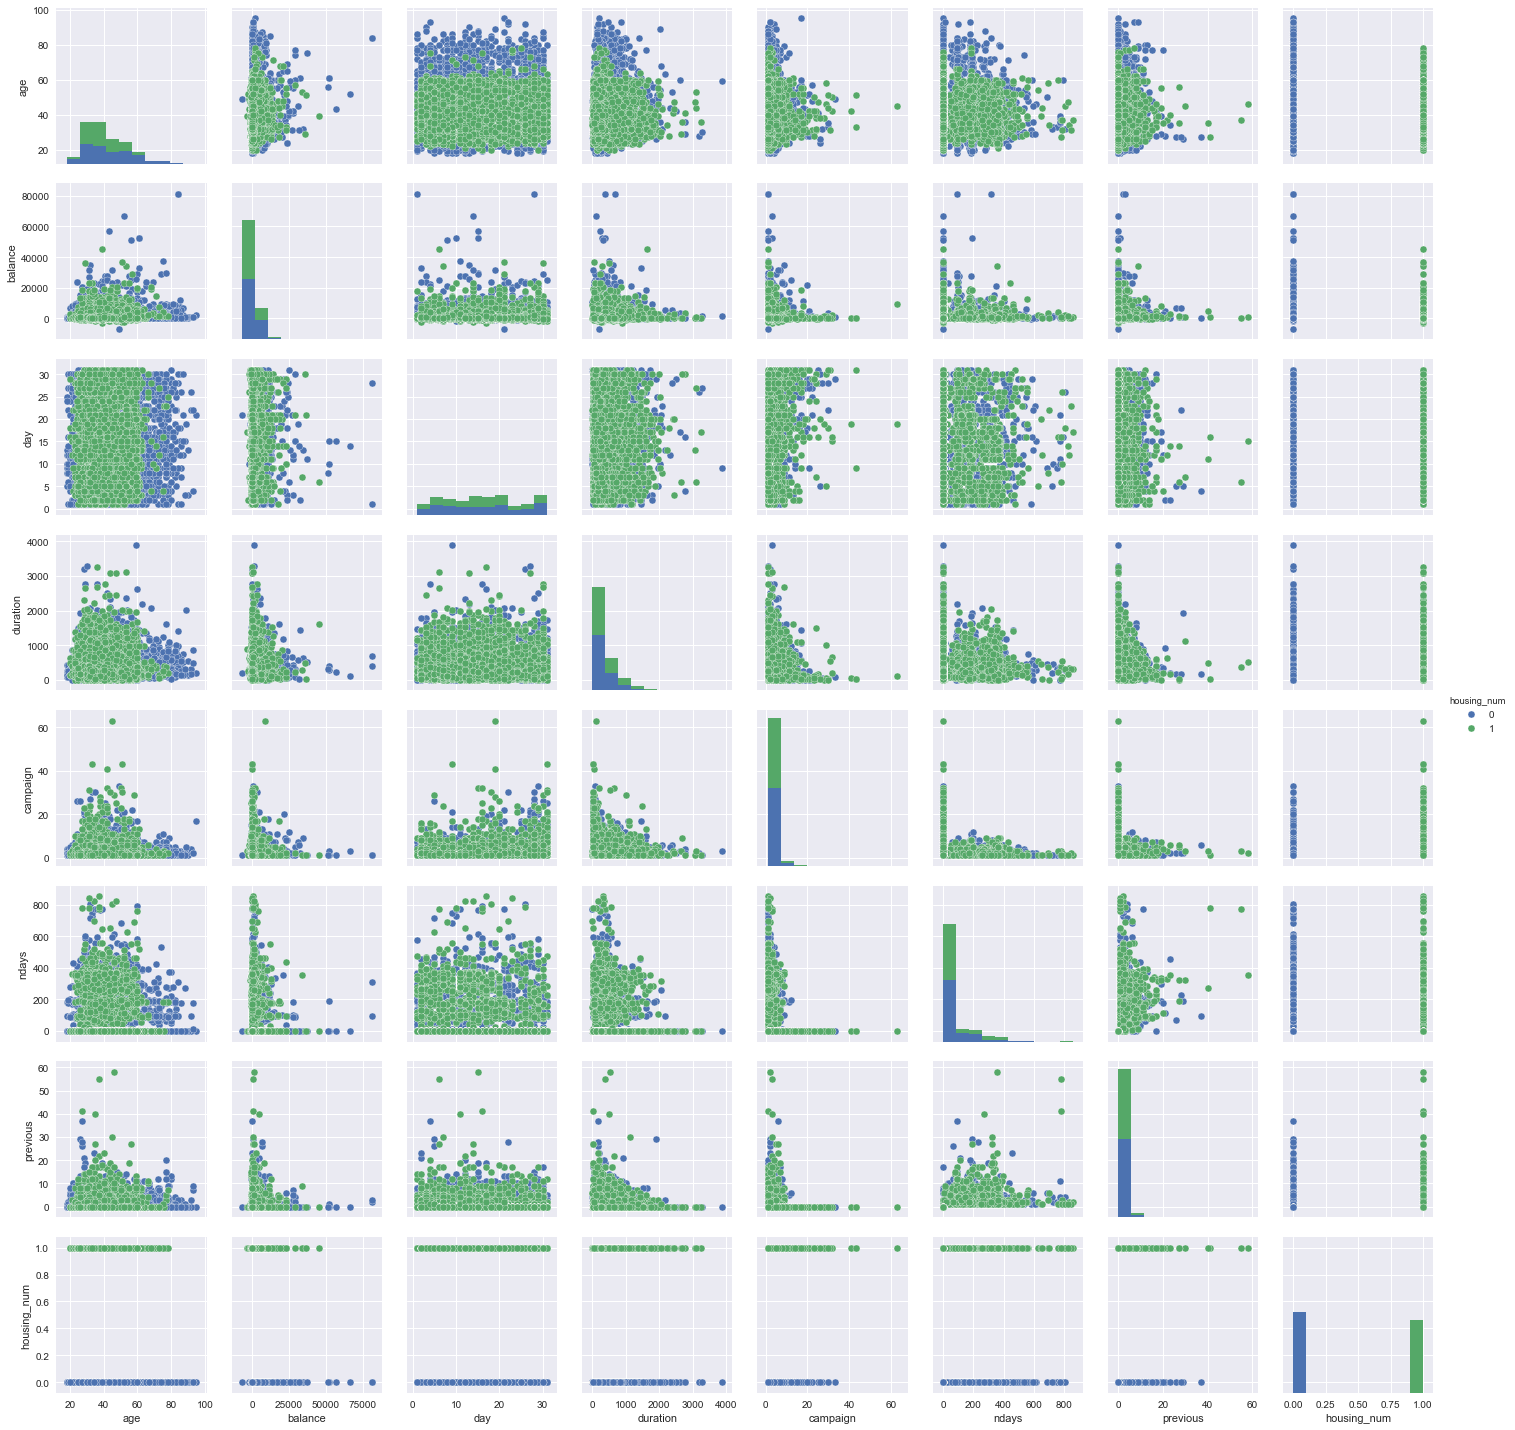

In [49]:
sns.pairplot(cust,hue='housing_num')

In [50]:
#sns.pairplot(cust_deposit_yes)

# 3. Data Munging and wrangling

In [51]:
cust.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'communication type', 'day', 'month', 'duration', 'campaign',
       'ndays', 'previous', 'poutcome', 'deposit', 'housing_num'],
      dtype='object')

In [52]:
cust['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

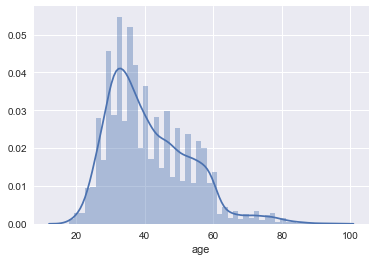

In [53]:
sns.distplot(cust['age'])

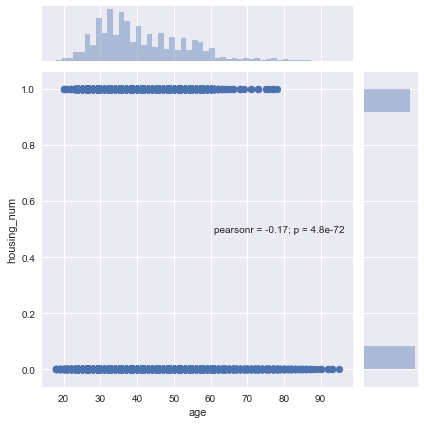

In [54]:
sns.jointplot(x='age',y='housing_num',data=cust,kind='scatter')

In [55]:
cust['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

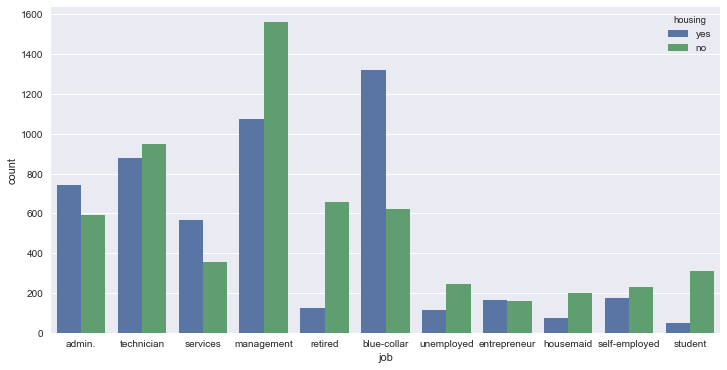

In [56]:
cust.job=cust.job.fillna('management')
plt.figure(figsize=(12,6))
sns.countplot(x='job',data=cust,hue='housing')

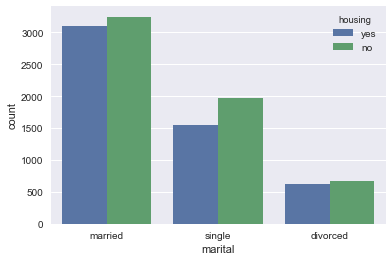

In [57]:
sns.countplot(x='marital',data=cust,hue='housing')

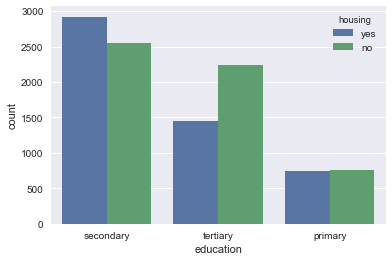

In [58]:
sns.countplot(x='education',data=cust,hue='housing')

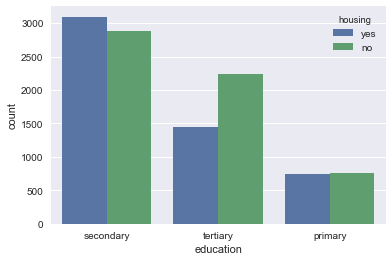

In [59]:
cust.education=cust.education.fillna('secondary')
sns.countplot(x='education',data=cust,hue='housing')

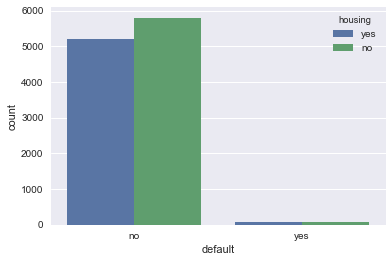

In [60]:
sns.countplot(x='default',data=cust,hue='housing')

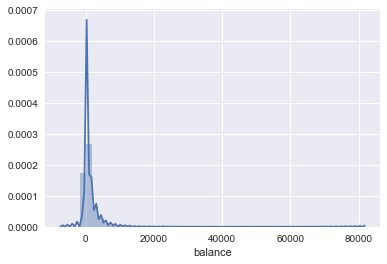

In [61]:
sns.distplot(cust['balance'])

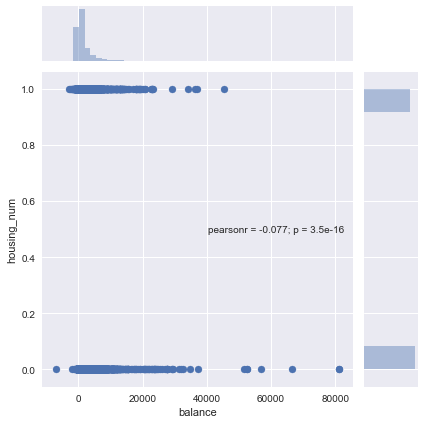

In [62]:
sns.jointplot(x='balance',y='housing_num',data=cust,kind='scatter')
#"scatter" | "reg" | "resid" | "kde" | "hex"

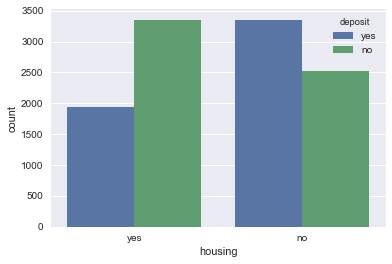

In [63]:
sns.countplot(x='housing',data=cust,hue='deposit')

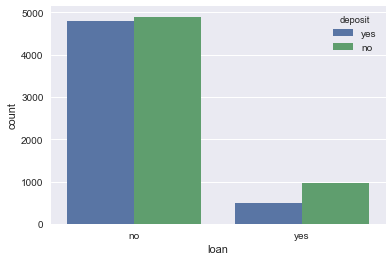

In [64]:
sns.countplot(x='loan',data=cust,hue='deposit')

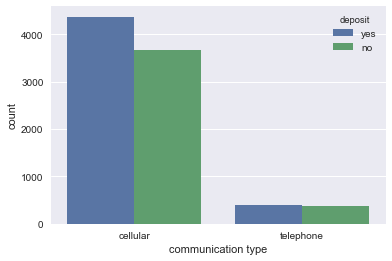

In [65]:
sns.countplot(x='communication type',data=cust,hue='deposit')

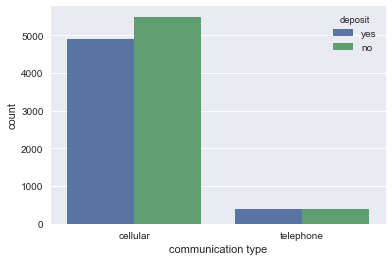

In [66]:
cust['communication type']=cust['communication type'].fillna('cellular')
sns.countplot(x='communication type',data=cust,hue='deposit')

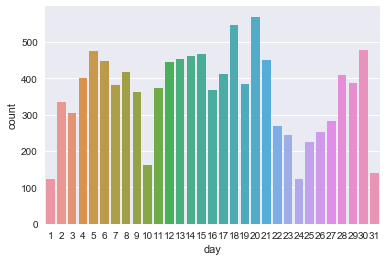

In [67]:
sns.countplot(x='day',data=cust)

In [68]:
cust.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

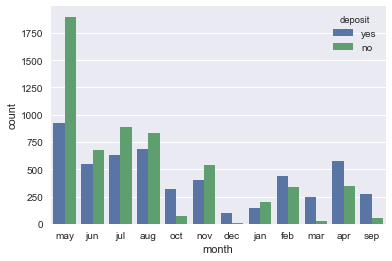

In [69]:
sns.countplot(x='month',data=cust, hue='deposit')

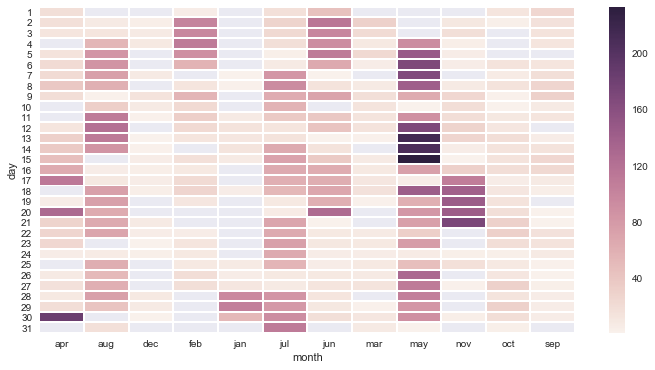

In [70]:
day_month=cust.groupby(by=['day','month']).count()['housing'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(day_month,linecolor='white',linewidth=1)

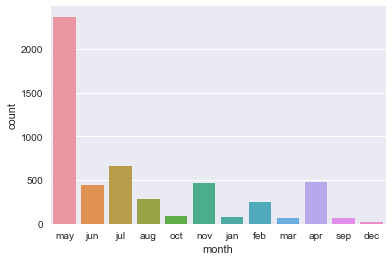

In [71]:
sns.countplot(x='month',data=cust_deposit_yes)

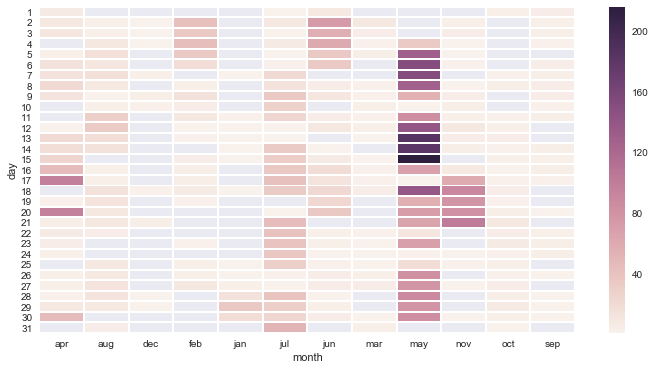

In [72]:
day_month=cust_deposit_yes.groupby(by=['day','month']).count()['deposit'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(day_month,linecolor='white',linewidth=1)

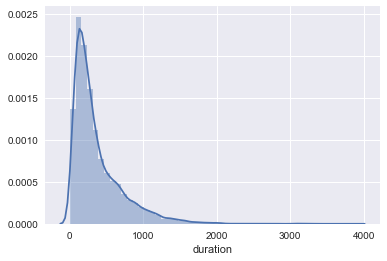

In [73]:
sns.distplot(cust['duration'])

TypeError: string indices must be integers

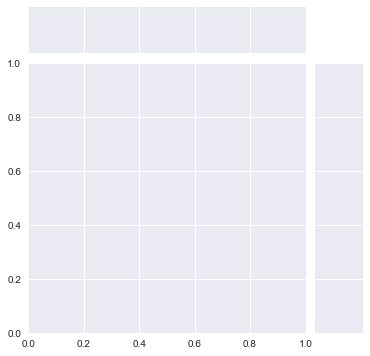

In [74]:
sns.jointplot(x='duration',y='deposit_num',data=cust,kind='scatter')

In [ ]:
sns.distplot(cust['campaign'])

In [ ]:
sns.jointplot(x='campaign',y='deposit_num',data=cust,kind='scatter')

In [ ]:
sns.distplot(cust['ndays'])

In [ ]:
sns.jointplot(x='ndays',y='deposit_num',data=cust,kind='scatter')

In [ ]:
sns.distplot(cust['previous'])

In [ ]:
sns.jointplot(x='previous',y='deposit_num',data=cust,kind='scatter')

In [ ]:
sns.countplot(x='poutcome',data=cust,hue='deposit')

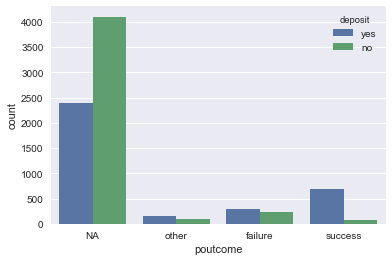

In [145]:
cust['poutcome']=cust['poutcome'].fillna('NA')
sns.countplot(x='poutcome',data=cust,hue='deposit')

In [146]:
cust.poutcome.value_counts()

NA         6500
success     754
failure     518
other       241
Name: poutcome, dtype: int64

In [76]:
import locale
import calendar
list(calendar.month_abbr).index('oct'.title())

10

In [77]:
def test(cat_name):
    if cat_name=='default_num' or cat_name=='housing_num' or cat_name=='loan_num':
        return True;
    else:
        return False;
print(test('num'))

False


In [147]:
def conv_cat2num(cat_name, x):
    if cat_name=='default' or cat_name=='housing' or cat_name=='loan':
        if(x=='yes'):
            return 1
        elif(x=='no'): 
            return 0
        else:
            print('default-',x)
    elif cat_name=='month':
        return list(calendar.month_abbr).index(x.title())
    elif cat_name=='job':
        if(x=='admin.'):
            return 1
        elif(x=='technician'): 
            return 2
        elif(x=='services'):
            return 3
        elif(x=='management' or x=='unknown'): 
            return 4
        elif(x=='retired'):
            return 5
        elif(x=='blue-collar'): 
            return 6
        elif(x=='unemployed'):
            return 7
        elif(x=='entrepreneur'): 
            return 8
        elif(x=='housemaid'):
            return 9
        elif(x=='unknown'): 
            return 10
        elif(x=='self-employed'):
            return 11
        elif(x=='student'): 
            return 12
        else: 
            print('job-',x)
    elif cat_name=='marital':
        if(x=='single'):
            return 1
        elif(x=='married'): 
            return 2
        elif(x=='divorced'):
            return 3
        else: 
            print('marital-',x)
    elif cat_name=='education':
        if(x=='primary'):
            return 1
        elif(x=='secondary' or x=='unknown'): 
            return 2
        elif(x=='tertiary'):
            return 3
        else: 
            print('education-',x)
    elif cat_name=='communication type':
        if(x=='cellular' or x=='unknown'):
            return 1
        elif(x=='telephone'): 
            return 2
        else: 
            print('comm type-',x)
    elif cat_name=='poutcome':
        if(x=='success'):
            return 1
        elif(x=='failure'): 
            return 2
        elif(x=='other'):
            return 3
        elif(x=='NA' or x=='unknown'):
            return 4
        else: 
            print('poutcome-',x)

In [148]:
#Convert yes/no to 1/0
cust['default_num']=cust['default'].apply(lambda x: conv_cat2num('default',x) )
cust['deposit_num']=cust['deposit'].apply(lambda x: conv_cat2num('housing',x))
cust['loan_num']=cust['loan'].apply(lambda x: conv_cat2num('loan',x))
cust['month_num']=cust['month'].apply(lambda x: conv_cat2num('month',x))
cust['job_num']=cust['job'].apply(lambda x: conv_cat2num('job',x) )
cust['marital_num']=cust['marital'].apply(lambda x: conv_cat2num('marital',x))
cust['education_num']=cust['education'].apply(lambda x: conv_cat2num('education',x))
cust['communication type_num']=cust['communication type'].apply(lambda x: conv_cat2num('communication type',x))
cust['poutcome_num']=cust['poutcome'].apply(lambda x: conv_cat2num('poutcome',x))

In [149]:
cust.head(5)

,age,job,marital,education,default,balance,housing,loan,communication type,day,...,housing_num,default_num,deposit_num,loan_num,month_num,job_num,marital_num,education_num,communication type_num,poutcome_num
3,55,services,married,secondary,no,2476,yes,no,cellular,5,...,1,0,1,0,5,3,2,2,1,4
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,...,0,0,1,0,5,1,2,3,1,4
5,42,management,single,tertiary,no,0,yes,yes,cellular,5,...,1,0,1,1,5,4,1,3,1,4
8,37,technician,married,secondary,no,1,yes,no,cellular,6,...,1,0,1,0,5,2,2,2,1,4
10,38,admin.,single,secondary,no,100,yes,no,cellular,7,...,1,0,1,0,5,1,1,2,1,4


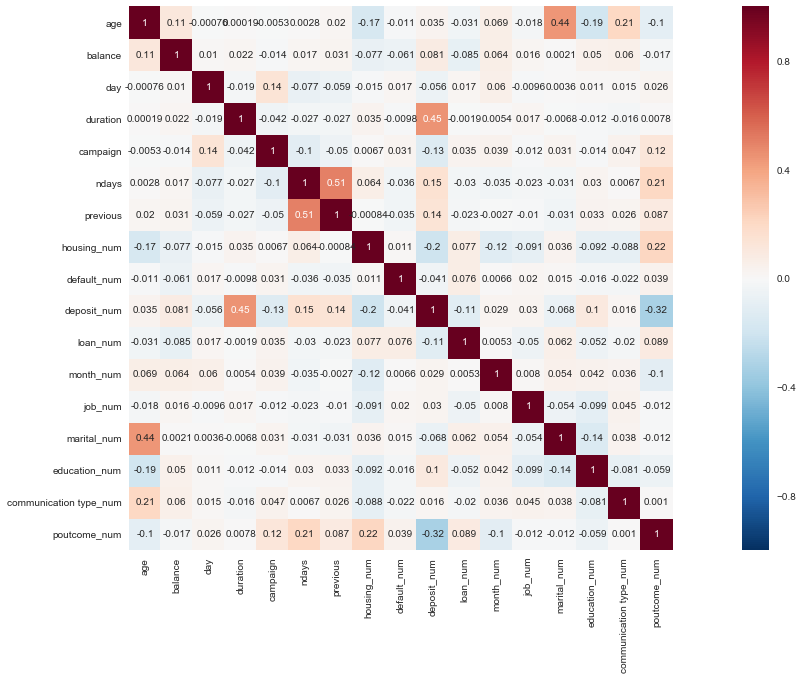

In [81]:
correlation=cust.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

## Outliers identification & removal 

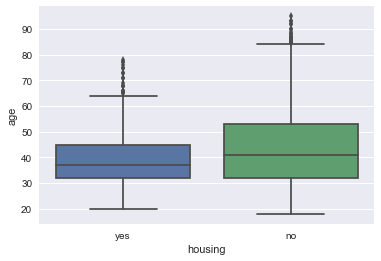

In [82]:
#check outliers
sns.boxplot(x=cust['housing'],y=cust['age'])

In [83]:
#Remove outliers
print('1º Quartile: ', cust['age'].quantile(q = 0.25))
print('2º Quartile: ', cust['age'].quantile(q = 0.50))
print('3º Quartile: ', cust['age'].quantile(q = 0.75))
print('4º Quartile: ', cust['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('Ages below: ', cust['age'].quantile(q = 0.25) - 
                      1.5*(cust['age'].quantile(q = 0.75) - cust['age'].quantile(q = 0.25)), 'are outliers')    
print('Ages above: ', cust['age'].quantile(q = 0.75) + 
                      1.5*(cust['age'].quantile(q = 0.75) - cust['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  39.0
3º Quartile:  49.0
4º Quartile:  95.0
Ages below:  6.5 are outliers
Ages above:  74.5 are outliers


In [84]:
print('upper outliers : ', cust[cust['age']>74.5]['age'].count())
print('lower outliers : ', cust[cust['age']<6.5]['age'].count())

upper outliers :  171
lower outliers :  0


In [85]:
cust.drop(cust[cust['age']>74.5].index, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10991 entries, 0 to 11161
Data columns (total 27 columns):
age                       10991 non-null int64
job                       10991 non-null object
marital                   10991 non-null object
education                 10991 non-null object
default                   10991 non-null object
balance                   10991 non-null int64
housing                   10991 non-null object
loan                      10991 non-null object
communication type        10991 non-null object
day                       10991 non-null int64
month                     10991 non-null object
duration                  10991 non-null int64
campaign                  10991 non-null int64
ndays                     10991 non-null int64
previous                  10991 non-null int64
poutcome                  2763 non-null object
deposit                   10991 non-null object
housing_num               10991 non-null int64
default_num               10991 non-

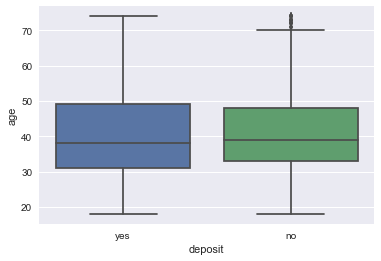

In [86]:
sns.boxplot(x=cust['deposit'],y=cust['age'])

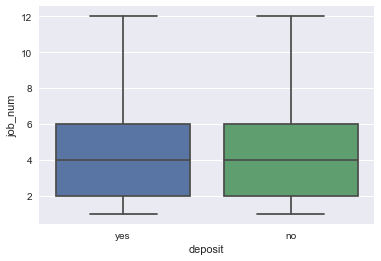

In [87]:
sns.boxplot(x=cust['deposit'],y=cust['job_num'])

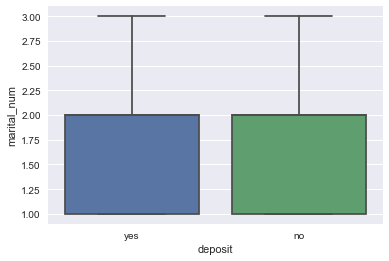

In [88]:
sns.boxplot(x=cust['deposit'],y=cust['marital_num'])

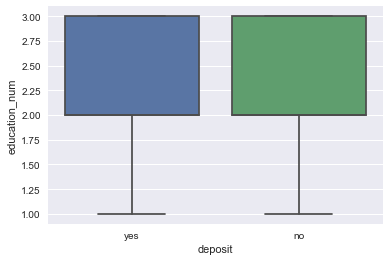

In [89]:
sns.boxplot(x=cust['deposit'],y=cust['education_num'])

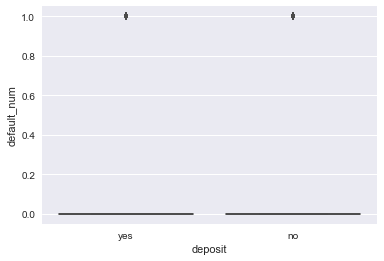

In [90]:
sns.boxplot(x=cust['deposit'],y=cust['default_num'])

In [91]:
cust.default_num.value_counts()

0    10823
1      168
Name: default_num, dtype: int64

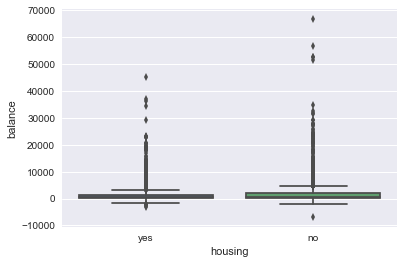

In [92]:
sns.boxplot(x=cust['housing'],y=cust['balance'])
#check outliers

In [93]:
#Remove outliers
print('1º Quartile: ', cust['balance'].quantile(q = 0.25))
print('2º Quartile: ', cust['balance'].quantile(q = 0.50))
print('3º Quartile: ', cust['balance'].quantile(q = 0.75))
print('4º Quartile: ', cust['balance'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('balances below: ', cust['balance'].quantile(q = 0.25) - 
                      1.5*(cust['balance'].quantile(q = 0.75) - cust['balance'].quantile(q = 0.25)), 'are outliers')    
print('balances above: ', cust['balance'].quantile(q = 0.75) + 
                      1.5*(cust['balance'].quantile(q = 0.75) - cust['balance'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  119.0
2º Quartile:  538.0
3º Quartile:  1683.5
4º Quartile:  66653.0
balances below:  -2227.75 are outliers
balances above:  4030.25 are outliers


In [94]:
print('upper outliers : ', cust[cust['balance']>4030.25]['balance'].count())
print('lower outliers : ', cust[cust['balance']<-2227.75]['balance'].count())

upper outliers :  1033
lower outliers :  4


In [150]:
cust.drop(cust[cust['balance']>4030.25].index, inplace=True)
cust.drop(cust[cust['balance']<-2227.75].index, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3 to 11161
Data columns (total 27 columns):
age                       8013 non-null int64
job                       8013 non-null object
marital                   8013 non-null object
education                 8013 non-null object
default                   8013 non-null object
balance                   8013 non-null int64
housing                   8013 non-null object
loan                      8013 non-null object
communication type        8013 non-null object
day                       8013 non-null int64
month                     8013 non-null object
duration                  8013 non-null int64
campaign                  8013 non-null int64
ndays                     8013 non-null int64
previous                  8013 non-null int64
poutcome                  8013 non-null object
deposit                   8013 non-null object
housing_num               8013 non-null int64
default_num               8013 non-null int64
deposit_

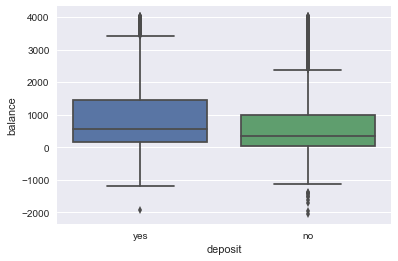

In [96]:
sns.boxplot(x=cust['deposit'],y=cust['balance'])

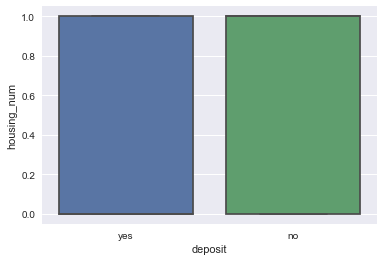

In [97]:
sns.boxplot(x=cust['deposit'],y=cust['housing_num'])

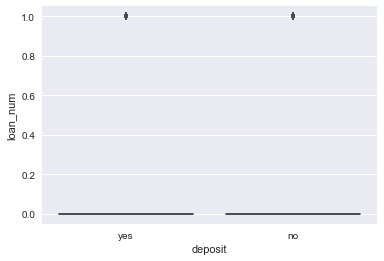

In [98]:
sns.boxplot(x=cust['deposit'],y=cust['loan_num'])

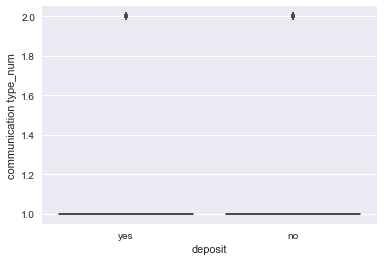

In [99]:
sns.boxplot(x=cust['deposit'],y=cust['communication type_num'])
#try reverting data updates to 'cellular)

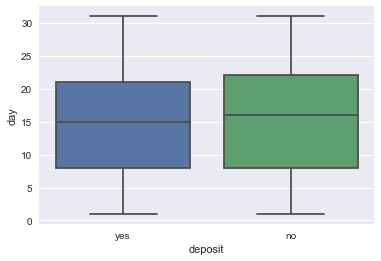

In [100]:
sns.boxplot(x=cust['deposit'],y=cust['day'])

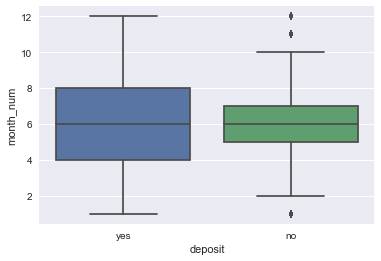

In [101]:
sns.boxplot(x=cust['deposit'],y=cust['month_num'])

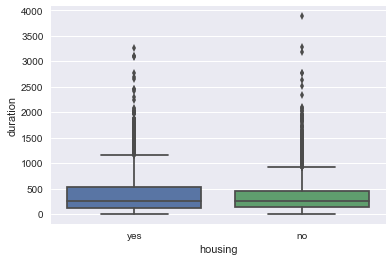

In [102]:
sns.boxplot(x=cust['housing'],y=cust['duration'])
#Check outliers

In [103]:
#Remove outliers
print('1º Quartile: ', cust['duration'].quantile(q = 0.25))
print('2º Quartile: ', cust['duration'].quantile(q = 0.50))
print('3º Quartile: ', cust['duration'].quantile(q = 0.75))
print('4º Quartile: ', cust['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('durations below: ', cust['duration'].quantile(q = 0.25) - 
                      1.5*(cust['duration'].quantile(q = 0.75) - cust['duration'].quantile(q = 0.25)), 'are outliers')    
print('durations above: ', cust['duration'].quantile(q = 0.75) + 
                      1.5*(cust['duration'].quantile(q = 0.75) - cust['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  136.0
2º Quartile:  252.0
3º Quartile:  491.0
4º Quartile:  3881.0
durations below:  -396.5 are outliers
durations above:  1023.5 are outliers


In [104]:
print('upper outliers : ', cust[cust['duration']>1023.5]['duration'].count())
print('lower outliers : ', cust[cust['duration']<-396.5]['duration'].count())

upper outliers :  581
lower outliers :  0


In [105]:
cust.drop(cust[cust['duration']>1023.5].index, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 3 to 11161
Data columns (total 27 columns):
age                       9373 non-null int64
job                       9373 non-null object
marital                   9373 non-null object
education                 9373 non-null object
default                   9373 non-null object
balance                   9373 non-null int64
housing                   9373 non-null object
loan                      9373 non-null object
communication type        9373 non-null object
day                       9373 non-null int64
month                     9373 non-null object
duration                  9373 non-null int64
campaign                  9373 non-null int64
ndays                     9373 non-null int64
previous                  9373 non-null int64
poutcome                  2394 non-null object
deposit                   9373 non-null object
housing_num               9373 non-null int64
default_num               9373 non-null int64
deposit_

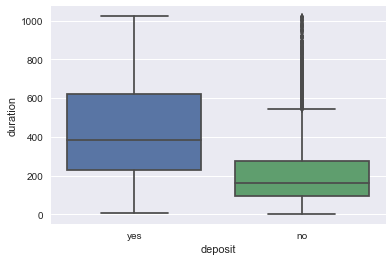

In [106]:
sns.boxplot(x=cust['deposit'],y=cust['duration'])

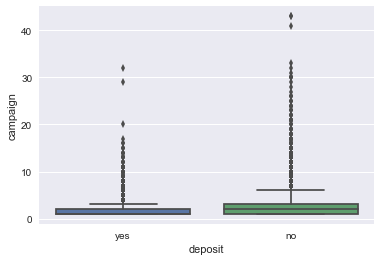

In [107]:
sns.boxplot(x=cust['deposit'],y=cust['campaign'])
#Check outliers

In [108]:
#Remove outliers
print('1º Quartile: ', cust['campaign'].quantile(q = 0.25))
print('2º Quartile: ', cust['campaign'].quantile(q = 0.50))
print('3º Quartile: ', cust['campaign'].quantile(q = 0.75))
print('4º Quartile: ', cust['campaign'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('campaigns below: ', cust['campaign'].quantile(q = 0.25) - 
                      1.5*(cust['campaign'].quantile(q = 0.75) - cust['campaign'].quantile(q = 0.25)), 'are outliers')    
print('campaigns above: ', cust['campaign'].quantile(q = 0.75) + 
                      1.5*(cust['campaign'].quantile(q = 0.75) - cust['campaign'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  43.0
campaigns below:  -2.0 are outliers
campaigns above:  6.0 are outliers


In [109]:
print('upper outliers : ', cust[cust['campaign']>6]['campaign'].count())
print('lower outliers : ', cust[cust['campaign']<-2]['campaign'].count())

upper outliers :  512
lower outliers :  0


In [110]:
cust.drop(cust[cust['campaign']>6].index, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 3 to 11161
Data columns (total 27 columns):
age                       8861 non-null int64
job                       8861 non-null object
marital                   8861 non-null object
education                 8861 non-null object
default                   8861 non-null object
balance                   8861 non-null int64
housing                   8861 non-null object
loan                      8861 non-null object
communication type        8861 non-null object
day                       8861 non-null int64
month                     8861 non-null object
duration                  8861 non-null int64
campaign                  8861 non-null int64
ndays                     8861 non-null int64
previous                  8861 non-null int64
poutcome                  2361 non-null object
deposit                   8861 non-null object
housing_num               8861 non-null int64
default_num               8861 non-null int64
deposit_

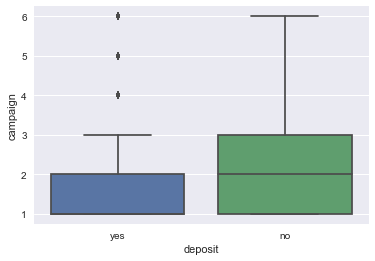

In [111]:
sns.boxplot(x=cust['deposit'],y=cust['campaign'])
#Check outliers

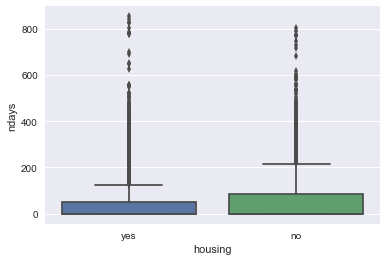

In [112]:
sns.boxplot(x=cust['housing'],y=cust['ndays'])
#Check outliers

In [113]:
#Remove outliers
print('1º Quartile: ', cust['ndays'].quantile(q = 0.25))
print('2º Quartile: ', cust['ndays'].quantile(q = 0.50))
print('3º Quartile: ', cust['ndays'].quantile(q = 0.75))
print('4º Quartile: ', cust['ndays'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('ndays below: ', cust['ndays'].quantile(q = 0.25) - 
                      1.5*(cust['ndays'].quantile(q = 0.75) - cust['ndays'].quantile(q = 0.25)), 'are outliers')    
print('ndays above: ', cust['ndays'].quantile(q = 0.75) + 
                      1.5*(cust['ndays'].quantile(q = 0.75) - cust['ndays'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  -1.0
2º Quartile:  -1.0
3º Quartile:  82.0
4º Quartile:  854.0
ndays below:  -125.5 are outliers
ndays above:  206.5 are outliers


In [114]:
print('upper outliers : ', cust[cust['ndays']>206.5]['ndays'].count())
print('lower outliers : ', cust[cust['ndays']<-125.5]['ndays'].count())

upper outliers :  848
lower outliers :  0


In [115]:
cust.drop(cust[cust['ndays']>206.5].index, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3 to 11161
Data columns (total 27 columns):
age                       8013 non-null int64
job                       8013 non-null object
marital                   8013 non-null object
education                 8013 non-null object
default                   8013 non-null object
balance                   8013 non-null int64
housing                   8013 non-null object
loan                      8013 non-null object
communication type        8013 non-null object
day                       8013 non-null int64
month                     8013 non-null object
duration                  8013 non-null int64
campaign                  8013 non-null int64
ndays                     8013 non-null int64
previous                  8013 non-null int64
poutcome                  1513 non-null object
deposit                   8013 non-null object
housing_num               8013 non-null int64
default_num               8013 non-null int64
deposit_

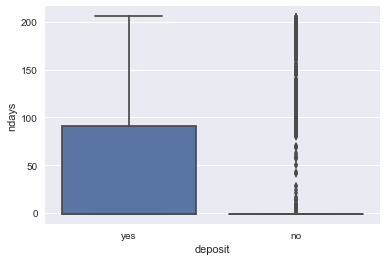

In [116]:
sns.boxplot(x=cust['deposit'],y=cust['ndays'])
#Check outliers

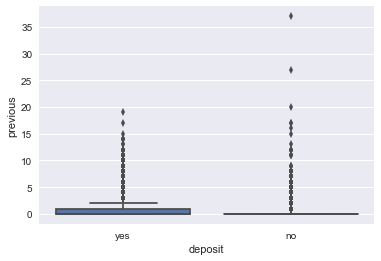

In [117]:
sns.boxplot(x=cust['deposit'],y=cust['previous'])
#Check outliers

In [118]:
#Remove outliers
print('1º Quartile: ', cust['previous'].quantile(q = 0.25))
print('2º Quartile: ', cust['previous'].quantile(q = 0.50))
print('3º Quartile: ', cust['previous'].quantile(q = 0.75))
print('4º Quartile: ', cust['previous'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('previous below: ', cust['previous'].quantile(q = 0.25) - 
                      1.5*(cust['previous'].quantile(q = 0.75) - cust['previous'].quantile(q = 0.25)), 'are outliers')    
print('previous above: ', cust['previous'].quantile(q = 0.75) + 
                      1.5*(cust['previous'].quantile(q = 0.75) - cust['previous'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  37.0
previous below:  0.0 are outliers
previous above:  0.0 are outliers


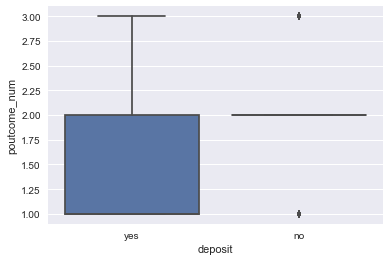

In [119]:
sns.boxplot(x=cust['deposit'],y=cust['poutcome_num'])
#Check outliers

In [120]:
#Remove outliers
print('1º Quartile: ', cust['poutcome_num'].quantile(q = 0.25))
print('2º Quartile: ', cust['poutcome_num'].quantile(q = 0.50))
print('3º Quartile: ', cust['poutcome_num'].quantile(q = 0.75))
print('4º Quartile: ', cust['poutcome_num'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('below: ', cust['poutcome_num'].quantile(q = 0.25) - 
                      1.5*(cust['poutcome_num'].quantile(q = 0.75) - cust['poutcome_num'].quantile(q = 0.25)), 'are outliers')    
print('above: ', cust['poutcome_num'].quantile(q = 0.75) + 
                      1.5*(cust['poutcome_num'].quantile(q = 0.75) - cust['poutcome_num'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  2.0
4º Quartile:  3.0
below:  -0.5 are outliers
above:  3.5 are outliers


In [140]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 3 to 11161
Data columns (total 27 columns):
age                       8013 non-null int64
job                       8013 non-null object
marital                   8013 non-null object
education                 8013 non-null object
default                   8013 non-null object
balance                   8013 non-null int64
housing                   8013 non-null object
loan                      8013 non-null object
communication type        8013 non-null object
day                       8013 non-null int64
month                     8013 non-null object
duration                  8013 non-null int64
campaign                  8013 non-null int64
ndays                     8013 non-null int64
previous                  8013 non-null int64
poutcome                  8013 non-null object
deposit                   8013 non-null object
housing_num               8013 non-null int64
default_num               8013 non-null int64
deposit_

In [144]:
int(cust['poutcome_num'])

TypeError: cannot convert the series to <class 'int'>

In [151]:
features=cust[['age', 'job_num', 'marital_num', 'education_num', 'balance', 'deposit_num',
       'month_num', 'duration', 'campaign', 'ndays', 'previous', 'poutcome_num']]
label=cust['housing_num']

In [123]:
features.shape

(8013, 12)

In [124]:
label.shape

(8013,)

# 4. Data Modelling

## Logistic Regression with random state calculation

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [152]:
#to find the best random state : 1st run without 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary' features
maxscore=0
maxi=0
for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    train_score=lr.score(x_train,y_train)
    test_score=lr.score(x_test,y_test)
    if (train_score+test_score)>maxscore:
        maxscore=train_score+test_score
        maxi=i
    #print('random state=',i,' train score=',train_score,' test score=',test_score)
print(maxscore, ' & ', maxi)

1.32256611288  &  98


In [153]:
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.3,random_state=98)

In [154]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
#check the generalizzation of the model
print(lr.score(x_train, y_train)) # Known facts
print(lr.score(x_test,y_test)) # Unknown facts

0.647530754145
0.654742096506


In [ ]:
predictions= lr.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
model_GBC = GradientBoostingClassifier()
model_GBC

In [ ]:
# get the importance of variables
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=df.drop(['housing'], axis=1).columns.values)
weights.sort_values().plot(kind = 'barh')

In [ ]:
# Applying PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 12)
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)
#explained_variance = pca.explained_variance_ratio_
#explained_variance

## Models Comparison

In [127]:
# Support functions
from sklearn.decomposition import PCA

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Scoring functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [128]:
def evaluate(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1-score': f1_score(y_true, y_pred, average='weighted'),
        'roc_auc': roc_auc_score(y_true, y_pred)
    }

In [129]:
def model_selection(X_train, X_test, y_train, y_test, models):
    results = []
    for name in models.keys():
        model = models.get(name)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result = evaluate(y_test, y_pred)
        result['model'] = name
        results.append(result)
        
    model_compare = pd.DataFrame(data=results)    
    model_compare.sort_values(by=['accuracy'], ascending=False).plot.bar(x='model', y='accuracy')
    model_compare.sort_values(by=['f1-score'], ascending=False).plot.bar(x='model', y='f1-score')
    return(model_compare)

In [137]:
features=cust[['age', 'job_num', 'marital_num', 'education_num', 'balance', 'deposit_num',
       'day', 'month_num', 'duration', 'campaign', 'ndays', 'previous', 'poutcome_num']] 
label=cust['housing_num']

,accuracy,f1-score,model,precision,recall,roc_auc
0,0.655158,0.654323,LogReg,0.654079,0.655158,0.650288
1,0.558236,0.558202,KNN,0.558169,0.558236,0.554429
2,0.611897,0.605114,NB,0.642781,0.611897,0.625702
3,0.676789,0.677458,DTC,0.680327,0.676789,0.677783
4,0.753328,0.751882,ADB,0.753251,0.753328,0.747290
5,0.746256,0.744171,RFC,0.746694,0.746256,0.739046
6,0.769135,0.767781,GBC,0.769306,0.769135,0.763231
7,0.549085,0.402027,SVM,0.579692,0.549085,0.504661


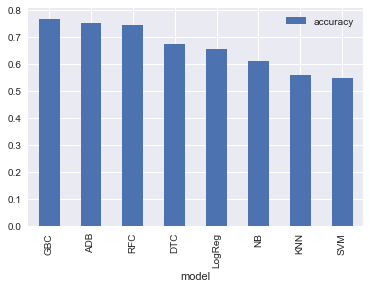

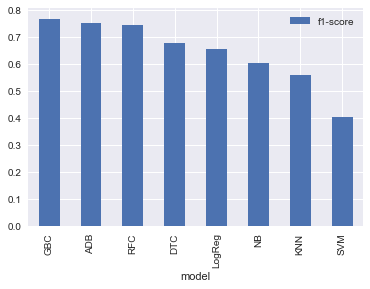

In [155]:
models = {'LogReg': LogisticRegression(solver='lbfgs'), 'KNN': KNeighborsClassifier(), 'NB': GaussianNB(),
          'DTC': DecisionTreeClassifier(), 'ADB': AdaBoostClassifier(),'RFC': RandomForestClassifier(), 
          'GBC': GradientBoostingClassifier(), 'SVM' : SVC()}#'XGB': XGBClassifier()

x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.3,random_state=0)

# no Scaler

model_selection(x_train, x_test, y_train, y_test, models)

In [ ]:
models = {'LogReg': LogisticRegression(solver='lbfgs'), 'KNN': KNeighborsClassifier(), 'NB': GaussianNB(),
          'DTC': DecisionTreeClassifier(), 'ADB': AdaBoostClassifier(),'RFC': RandomForestClassifier(), 
          'GBC': GradientBoostingClassifier(), 'SVM' : SVC()}#'XGB': XGBClassifier()

x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.3,random_state=0)

# Feature Scaling -- Try StandatdScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

model_selection(x_train, x_test, y_train, y_test, models)

,accuracy,f1-score,model,precision,recall,roc_auc
0,0.661814,0.661664,LogReg,0.661541,0.661814,0.658535
1,0.689268,0.689303,KNN,0.689341,0.689268,0.686759
2,0.611897,0.605205,NB,0.642537,0.611897,0.625625
3,0.667221,0.667868,DTC,0.669991,0.667221,0.667482
4,0.746256,0.746508,ADB,0.746992,0.746256,0.745265
5,0.746672,0.744950,RFC,0.746714,0.746672,0.740118
6,0.761647,0.761638,GBC,0.761629,0.761647,0.759596
7,0.660566,0.661219,SVM,0.663260,0.660566,0.660693


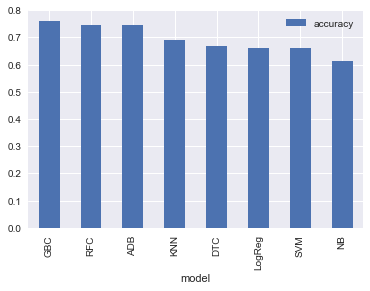

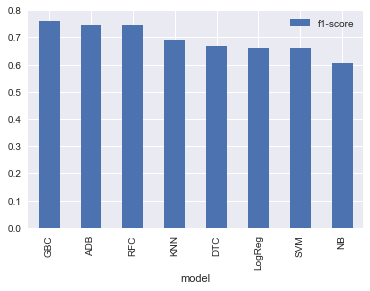

In [157]:
models = {'LogReg': LogisticRegression(solver='lbfgs'), 'KNN': KNeighborsClassifier(), 'NB': GaussianNB(),
          'DTC': DecisionTreeClassifier(), 'ADB': AdaBoostClassifier(),'RFC': RandomForestClassifier(), 
          'GBC': GradientBoostingClassifier(), 'SVM' : SVC()}#'XGB': XGBClassifier()

x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.3,random_state=0)

# Feature Scaling - Try MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmaxsc = MinMaxScaler()
x_train = minmaxsc.fit_transform(x_train)
x_test = minmaxsc.fit_transform(x_test)

model_selection(x_train, x_test, y_train, y_test, models)

## Model deployment 

In [158]:
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

import pickle
with open('cust_deposit_predictor.model','wb') as f:
    pickle.dump(rfc,f)
#here we are creating a dump of our model into a file named 'salary_predictor.model
#you can just share this model file to others

In [ ]:
import pickle
import numpy as np

model=pickle.load(open('cust_deposit_predictor.model','rb'))

print('Enter Customer Details..')
age=int(input('Age : '))
job=input('Job type [admin., technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, self-employed, student or unknown] :')
marital=input('Marital status [single, married, divorced] : ')
education=input('Highest education [primary, secondary, tertiary or unknown] :')
balance=int(input('Account Balance : '))
housing=input('Housing Loan [yes, no] : ')

job_num=conv_cat2num('job',job)
marital_num=conv_cat2num('marital',marital)
education_num=conv_cat2num('education',education)
housing_num=conv_cat2num('housing',housing)

print()
print('Enter Current Campaign Details of customer..')
month=input('Month, last contact made [ex. jan, feb.. dec] : ')
day=int(input('Day of month, last contact made [ex. 1.. 31] : '))
duration=int(input('Duration of last contact call [in seconds] : '))
campaign=int(input('Number of contacts made in this campaign [0 if no contact mdae] : '))

month_num=conv_cat2num('month',month)

print()
print('Enter Previous Campaign Details of customer..')
ndays=int(input('Number of days since last contact made [-1 if no contact mdae] : '))
previous=int(input('Total number of contacts made in previous campaign [0 if no contact mdae] : '))
poutcome=input('Deposit product subscription outcome [success, failure, other or unknown] : ')

poutcome_num=conv_cat2num('poutcome',poutcome)   

inputs=pd.DataFrame([[age,job_num,marital_num,education_num,balance,housing_num,day,month_num,duration,campaign,ndays,previous,poutcome_num]])
print(inputs)
inputs.shape

Enter Customer Details..


In [ ]:
pred='yes or success' if rfc.predict(inputs)==1 else 'no or failure'
print('Predicted status for customer subscribing to term deposit : ',pred)